In [1]:
import pandas as pd
pd.__version__

'1.2.4'

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

# Read Raw Matrix

https://github.com/ucsffrancislab/genomics/blob/master/data/20200603-TCGA-GBMLGG-WGS/20201029-hkle-chimera/create_count_matrix.bash

In [4]:
cm=pd.read_csv("data/count_matrix_rounded.csv.gz")
cm.rename(columns={"subject": "sample"},inplace=True)

In [5]:
cm['subject']=cm['sample'].astype(str).str[0:7]

In [6]:
cm.shape

(274, 311)

In [7]:
cm.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,...,r10000 uniq SVA_F paired human Q10 aligned,r100000 uniq SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject
0,02-2483-01A,566024474,5217,5099,2469,2451,2441,2420,2286,2286,...,1187,1187,2170,1474,1359,1303,1290,1170,1170,02-2483
1,02-2483-10A,579304076,4735,4646,2212,2202,2192,2175,2037,2037,...,1090,1090,1878,1321,1222,1177,1170,1076,1076,02-2483
2,02-2485-01A,575060540,5140,5047,2419,2402,2392,2374,2229,2229,...,1184,1184,2217,1443,1326,1268,1261,1167,1167,02-2485
3,02-2485-10A,478851061,3895,3849,1947,1935,1928,1914,1783,1783,...,1108,1108,1860,1325,1231,1189,1184,1094,1094,02-2485
4,06-0125-01A,1066268796,8464,8384,3521,3497,3483,3450,3292,3292,...,1810,1810,5507,2700,2293,2099,2068,1794,1794,06-0125


# Really only interested in the paired / Q20 data so dump the rest

In [8]:
cm = cm[cm.columns.drop(list(cm.filter(regex='unpaired')))]
cm = cm[cm.columns.drop(list(cm.filter(regex='Q00')))]
cm = cm[cm.columns.drop(list(cm.filter(regex='Q10')))]

In [9]:
cm[['subject','sample']].head()

,subject,sample
0,02-2483,02-2483-01A
1,02-2483,02-2483-10A
2,02-2485,02-2485-01A
3,02-2485,02-2485-10A
4,06-0125,06-0125-01A


# Note that this subject only has a normal sample?

In [10]:
cm[cm['subject']=='CS-5390']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_E paired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject
84,CS-5390-10A,529225224,2814,1161,580,568,559,553,459,459,...,1420,4288,1290,958,921,901,894,835,835,CS-5390


In [11]:
cm.shape

(274, 59)

In [12]:
cm=cm[(cm['sample'].str.contains("-01.$") | cm['sample'].str.contains("-10.$") )]

In [13]:
cm.shape

(246, 59)

In [14]:
cm[cm['subject']=='CS-5390']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_E paired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject
84,CS-5390-10A,529225224,2814,1161,580,568,559,553,459,459,...,1420,4288,1290,958,921,901,894,835,835,CS-5390


In [15]:
cm[cm['subject']=='FG-5963']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_E paired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject
194,FG-5963-01A,214570635,186,75,68,68,68,68,68,68,...,193,312,79,76,76,75,75,74,74,FG-5963


# Get rid of these 2 isolated samples

In [16]:
cm=cm[((cm['subject']!='CS-5390') & (cm['subject']!='FG-5963'))]

In [17]:
cm.shape

(244, 59)

In [18]:
cm[cm['subject']=='CS-5390']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_E paired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject


In [19]:
cm[cm['subject']=='FG-5963']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_E paired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject


Dropo these as they are represented multiple times
* CS-6186
* DU-5872

In [20]:
cm.drop(cm.loc[cm['subject']=='CS-6186'].index,axis='index',inplace=True)

In [21]:
cm.drop(cm.loc[cm['subject']=='DU-5872'].index,axis='index',inplace=True)

# Read Read Lengths 

In [22]:
rl=pd.read_csv("data/read_lengths.csv",header=None,
 names=['sequencing','length'])
rl.head()

,sequencing,length
0,02-2483-01A-01D-1494,101
1,02-2483-10A-01D-1494,101
2,02-2485-01A-01D-1494,101
3,02-2485-10A-01D-1494,101
4,06-0125-01A-01D-1490,101


In [23]:
rl['sample']=rl['sequencing'].str[0:11]

In [24]:
rl.head()

,sequencing,length,sample
0,02-2483-01A-01D-1494,101,02-2483-01A
1,02-2483-10A-01D-1494,101,02-2483-10A
2,02-2485-01A-01D-1494,101,02-2485-01A
3,02-2485-10A-01D-1494,101,02-2485-10A
4,06-0125-01A-01D-1490,101,06-0125-01A


In [25]:
cm=cm.merge(rl,on='sample')

# Read Metadata

In [26]:
mt=pd.read_csv("data/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [27]:
mt.shape

(127, 5)

In [28]:
mt.head()

,submitter,days_to_death,gender,disease_type,center_name
0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [29]:
list(mt)

['submitter', 'days_to_death', 'gender', 'disease_type', 'center_name']

In [30]:
for m in list(mt):
    print(m)
    print(mt[m].value_counts())
    print()

submitter
DU-5872    2
CS-6186    2
06-0157    1
DU-6401    1
DU-6402    1
          ..
FG-8182    1
DU-6408    1
27-1831    1
DB-5279    1
HT-7476    1
Name: submitter, Length: 125, dtype: int64

days_to_death
538.0     2
954.0     1
605.0     1
603.0     1
1448.0    1
         ..
33.0      1
269.0     1
360.0     1
2907.0    1
317.0     1
Name: days_to_death, Length: 66, dtype: int64

gender
male      73
female    54
Name: gender, dtype: int64

disease_type
Brain Lower Grade Glioma    92
Glioblastoma Multiforme     35
Name: disease_type, dtype: int64

center_name
Broad Institute of MIT and Harvard    75
Harvard Medical School                52
Name: center_name, dtype: int64



# Read Metadata 2

In [31]:
mt2=pd.read_csv("data/TCGA.Glioma.metadata.tsv",sep="\t")

In [32]:
mt2.shape

(1114, 18)

In [33]:
mt2.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.762054,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.731106,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.334941,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.333034,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.162705,1.0


In [34]:
mt2['primary_diagnosis'].unique()

array(['Glioblastoma', 'Astrocytoma, NOS', 'Astrocytoma, anaplastic',
       'Oligodendroglioma, NOS', 'Mixed glioma',
       'Oligodendroglioma, anaplastic'], dtype=object)

In [35]:
mt2['subject2']=mt2['case_submitter_id'].astype(str).str[5:12]

In [36]:
mt2[['subject2','case_submitter_id']].head()

,subject2,case_submitter_id
0,02-0001,TCGA-02-0001
1,02-0003,TCGA-02-0003
2,02-0004,TCGA-02-0004
3,02-0006,TCGA-02-0006
4,02-0007,TCGA-02-0007


In [37]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject2']

In [38]:
#for m in list(mt2):
for m in 'primary_diagnosis','race','ethnicity','IDH','x1p19q','TERT','Tissue_sample_location','MGMT','WHO_groups','Triple_group':
    print(m)
    print(mt2[m].value_counts())
    print()

primary_diagnosis
Glioblastoma                     599
Mixed glioma                     131
Astrocytoma, anaplastic          130
Oligodendroglioma, NOS           112
Oligodendroglioma, anaplastic     78
Astrocytoma, NOS                  64
Name: primary_diagnosis, dtype: int64

race
white                               982
black or african american            72
not reported                         38
asian                                21
american indian or alaska native      1
Name: race, dtype: int64

ethnicity
not hispanic or latino    939
not reported              130
hispanic or latino         45
Name: ethnicity, dtype: int64

IDH
WT        535
Mutant    456
Name: IDH, dtype: int64

x1p19q
non-codel    917
codel        171
Name: x1p19q, dtype: int64

TERT
WT        167
Mutant    162
Name: TERT, dtype: int64

Tissue_sample_location
Henry Ford Hospital                                               242
Case Western - St Joes                                            104
MD Anderson

In [39]:
#mt2.loc[mt2['TERT'].isna(), 'TERT'] = 'NAN' 
#mt2.loc[mt2['IDH'].isna(), 'IDH'] = 'NAN' 
#mt2.loc[mt2['x1p19q'].isna(), 'x1p19q'] = 'NAN' 

# Merge Metadata

In [40]:
meta=mt2.merge(mt,left_on='subject2',right_on='submitter',suffixes=["_mt2","_mt"],how='inner')

In [41]:
meta.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender_mt2,RE_names,IDH,x1p19q,TERT,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name
0,TCGA-02-2483,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,...,Methylated,43.0,15.310383,0.0,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,TCGA-02-2485,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,...,Unmethylated,53.0,15.441803,0.0,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,TCGA-06-0125,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,...,Methylated,63.0,47.573895,1.0,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,TCGA-06-0152,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,...,NaN,68.0,12.320588,1.0,06-0152,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,TCGA-06-0157,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,Mutant,...,NaN,63.0,3.186925,1.0,06-0157,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [42]:
meta.shape

(127, 24)

In [43]:
meta['project_id'].unique()

array(['TCGA-GBM', 'TCGA-LGG'], dtype=object)

In [44]:
meta['TERT'].unique()

array(['WT', 'Mutant', nan], dtype=object)

In [45]:
meta['IDH'].unique()

array(['Mutant', 'WT', nan], dtype=object)

In [46]:
list(meta)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender_mt2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject2',
 'submitter',
 'days_to_death',
 'gender_mt',
 'disease_type',
 'center_name']

# Merge

In [47]:
cm.shape

(240, 61)

In [48]:
meta.shape

(127, 24)

In [49]:
merged=cm.merge(meta,left_on='subject',right_on='submitter',suffixes=["_cm","_meta"],how='inner')

In [50]:
merged.shape

(240, 85)

In [51]:
merged[merged['subject']=='CS-6186']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name


In [52]:
merged[merged['subject']=='DU-5872']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name


Looks like there are a couple duplicate merges?

* CS-6186
* DU-5872

1 of each gets trimmed away later by the center selection.

In [53]:
merged.head()

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name
0,02-2483-01A,566024474,3558,1328,596,580,573,568,470,470,...,Methylated,43.0,15.310383,0.0,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2483-10A,579304076,3338,1308,586,569,562,557,460,460,...,Methylated,43.0,15.310383,0.0,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,02-2485-01A,575060540,3782,1523,622,598,591,587,469,469,...,Unmethylated,53.0,15.441803,0.0,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,02-2485-10A,478851061,2564,1061,520,508,503,498,410,410,...,Unmethylated,53.0,15.441803,0.0,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0125-01A,1066268796,5920,2514,816,761,742,734,568,568,...,Methylated,63.0,47.573895,1.0,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [54]:
merged['IDH'].unique()

array(['Mutant', 'WT', nan], dtype=object)

In [55]:
merged['TERT'].unique()

array(['WT', 'Mutant', nan], dtype=object)

In [56]:
merged['x1p19q'].unique()

array(['non-codel', 'codel'], dtype=object)

# Select ONLY those from Broad (Harvard Medical School's are too low)

In [57]:
df=merged[merged['center_name'] == 'Broad Institute of MIT and Harvard'].copy()

In [58]:
df.shape

(142, 85)

In [59]:
#df.to_csv('testingagain')

In [60]:
df['sample']

0      02-2483-01A
1      02-2483-10A
2      02-2485-01A
3      02-2485-10A
4      06-0125-01A
          ...     
235    TQ-A7RK-10A
236    TQ-A7RV-01A
237    TQ-A7RV-10A
238    TQ-A8XE-01A
239    TQ-A8XE-10A
Name: sample, Length: 142, dtype: object

In [61]:
df[df['subject']=='CS-6186']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name


In [62]:
df[df['subject']=='DU-5872']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name


In [63]:
df.shape

(142, 85)

In [64]:
df['sample'].shape

(142,)

In [65]:
df['sample'].unique().shape

(142,)

In [66]:
df['subject'].shape

(142,)

In [67]:
df['subject'].unique().shape

(71,)

# Normalize

In [68]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    df['normalized '+hkle+' paired human Q20 aligned']=\
        1000000000*df[hkle+' paired human Q20 aligned']/df['raw pair count']/df['length']
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        df['normalized '+s+'uniq '+hkle+' paired human Q20 aligned']=\
            1000000000*df[s+'uniq '+hkle+' paired human Q20 aligned']/df['raw pair count']/df['length']


HERVK113:
HERVK113:r10 
HERVK113:r100 
HERVK113:r1000 
HERVK113:r10000 
SVA_A:
SVA_A:r10 
SVA_A:r100 
SVA_A:r1000 
SVA_A:r10000 
SVA_B:
SVA_B:r10 
SVA_B:r100 
SVA_B:r1000 
SVA_B:r10000 
SVA_C:
SVA_C:r10 
SVA_C:r100 
SVA_C:r1000 
SVA_C:r10000 
SVA_D:
SVA_D:r10 
SVA_D:r100 
SVA_D:r1000 
SVA_D:r10000 
SVA_E:
SVA_E:r10 
SVA_E:r100 
SVA_E:r1000 
SVA_E:r10000 
SVA_F:
SVA_F:r10 
SVA_F:r100 
SVA_F:r1000 
SVA_F:r10000 


In [69]:
df[['subject','sample','r1000 uniq HERVK113 paired human Q20 aligned','raw pair count',
    'normalized r1000 uniq HERVK113 paired human Q20 aligned']]


,subject,sample,r1000 uniq HERVK113 paired human Q20 aligned,raw pair count,normalized r1000 uniq HERVK113 paired human Q20 aligned
0,02-2483,02-2483-01A,568,566024474,9.935546
1,02-2483,02-2483-10A,557,579304076,9.519787
2,02-2485,02-2485-01A,587,575060540,10.106555
3,02-2485,02-2485-10A,498,478851061,10.296924
4,06-0125,06-0125-01A,734,1066268796,6.815661
...,...,...,...,...,...
235,TQ-A7RK,TQ-A7RK-10A,796,372900517,14.136540
236,TQ-A7RV,TQ-A7RV-01A,934,626661130,9.870455
237,TQ-A7RV,TQ-A7RV-10A,891,362586651,16.273799
238,TQ-A8XE,TQ-A8XE-01A,1009,724443745,9.223793


# Are the number of HERVK113 sites correlated to the sequencing depth?

"HERVK113 paired reads aligned" is the number of raw reads that aligned over the end of HERVK113

# Normalization inverts the relationship

# What's up with the extreme HERVK113 peaks?

In [70]:
pd.set_option('display.max_columns', 20)

In [71]:
pd.set_option('display.max_rows', 60)

In [72]:
tumor=df[df['sample'].str.contains("-01.$")].copy()

In [73]:
tumor.shape

(71, 127)

In [74]:
tumor.head()

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,normalized r10 uniq SVA_E paired human Q20 aligned,normalized r100 uniq SVA_E paired human Q20 aligned,normalized r1000 uniq SVA_E paired human Q20 aligned,normalized r10000 uniq SVA_E paired human Q20 aligned,normalized SVA_F paired human Q20 aligned,normalized uniq SVA_F paired human Q20 aligned,normalized r10 uniq SVA_F paired human Q20 aligned,normalized r100 uniq SVA_F paired human Q20 aligned,normalized r1000 uniq SVA_F paired human Q20 aligned,normalized r10000 uniq SVA_F paired human Q20 aligned
0,02-2483-01A,566024474,3558,1328,596,580,573,568,470,470,...,39.269897,37.328267,36.995916,33.095165,37.957985,25.783442,23.771844,22.792283,22.564885,20.465826
2,02-2485-01A,575060540,3782,1523,622,598,591,587,469,469,...,38.170755,36.294069,36.001375,32.471829,38.170755,24.844565,22.830140,21.831537,21.711016,20.092590
4,06-0125-01A,1066268796,5920,2514,816,761,742,734,568,568,...,30.698332,27.717641,27.309073,23.130534,51.136029,25.071233,21.291977,19.490562,19.202707,16.658441
6,06-0157-01A,551037711,3280,1338,609,591,582,577,471,471,...,42.799536,40.086383,39.888736,35.432697,46.285309,28.982222,26.484684,25.119123,25.011316,22.675489
8,06-0171-01A,1170585350,6420,2672,841,785,761,750,583,583,...,28.740804,25.746618,25.357543,21.416044,48.152266,23.539040,19.715955,17.982033,17.660624,15.207759


In [75]:
tumor[tumor['subject']=='DH-A669']['normalized r1000 uniq HERVK113 paired human Q20 aligned']

98    10.66764
Name: normalized r1000 uniq HERVK113 paired human Q20 aligned, dtype: float64

In [76]:
normal=df[df['sample'].str.contains("-10.$")].copy()

In [77]:
normal.shape

(71, 127)

In [78]:
normal.head()

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,normalized r10 uniq SVA_E paired human Q20 aligned,normalized r100 uniq SVA_E paired human Q20 aligned,normalized r1000 uniq SVA_E paired human Q20 aligned,normalized r10000 uniq SVA_E paired human Q20 aligned,normalized SVA_F paired human Q20 aligned,normalized uniq SVA_F paired human Q20 aligned,normalized r10 uniq SVA_F paired human Q20 aligned,normalized r100 uniq SVA_F paired human Q20 aligned,normalized r1000 uniq SVA_F paired human Q20 aligned,normalized r10000 uniq SVA_F paired human Q20 aligned
1,02-2483-10A,579304076,3338,1308,586,569,562,557,460,460,...,35.344560,33.874718,33.737989,30.661576,32.097236,22.577448,20.885422,20.116319,19.996680,18.390109
3,02-2485-10A,478851061,2564,1061,520,508,503,498,410,410,...,43.317382,41.477168,41.332433,37.424564,38.458392,27.396435,25.452839,24.584423,24.481041,22.620151
5,06-0125-10A,695377506,3778,1494,667,636,624,620,498,498,...,36.549703,34.072240,33.844427,29.686845,39.126835,25.272974,23.009085,21.813068,21.642208,19.577656
7,06-0157-10A,561676819,3040,1179,567,551,547,542,446,446,...,38.639605,36.453788,36.171747,32.945904,35.642920,24.660952,22.951079,22.087329,21.911053,20.201180
9,06-0171-10A,721570484,3472,1306,592,567,555,552,445,445,...,33.631263,31.586768,31.394667,27.827092,32.245397,21.899427,20.211689,19.072809,18.963038,17.138085


In [79]:
normal[normal['subject']=='DH-A669']['normalized r1000 uniq HERVK113 paired human Q20 aligned']

99    16.268245
Name: normalized r1000 uniq HERVK113 paired human Q20 aligned, dtype: float64

In [80]:
tn=normal.merge(tumor,on='subject',suffixes=["_normal","_tumor"],how='outer')

In [81]:
tn.shape

(71, 253)

In [82]:
tn.head()

,sample_normal,raw pair count_normal,HERVK113 paired reads aligned_normal,HERVK113 paired human Q20 aligned_normal,uniq HERVK113 paired human Q20 aligned_normal,r10 uniq HERVK113 paired human Q20 aligned_normal,r100 uniq HERVK113 paired human Q20 aligned_normal,r1000 uniq HERVK113 paired human Q20 aligned_normal,r10000 uniq HERVK113 paired human Q20 aligned_normal,r100000 uniq HERVK113 paired human Q20 aligned_normal,...,normalized r10 uniq SVA_E paired human Q20 aligned_tumor,normalized r100 uniq SVA_E paired human Q20 aligned_tumor,normalized r1000 uniq SVA_E paired human Q20 aligned_tumor,normalized r10000 uniq SVA_E paired human Q20 aligned_tumor,normalized SVA_F paired human Q20 aligned_tumor,normalized uniq SVA_F paired human Q20 aligned_tumor,normalized r10 uniq SVA_F paired human Q20 aligned_tumor,normalized r100 uniq SVA_F paired human Q20 aligned_tumor,normalized r1000 uniq SVA_F paired human Q20 aligned_tumor,normalized r10000 uniq SVA_F paired human Q20 aligned_tumor
0,02-2483-10A,579304076,3338,1308,586,569,562,557,460,460,...,39.269897,37.328267,36.995916,33.095165,37.957985,25.783442,23.771844,22.792283,22.564885,20.465826
1,02-2485-10A,478851061,2564,1061,520,508,503,498,410,410,...,38.170755,36.294069,36.001375,32.471829,38.170755,24.844565,22.830140,21.831537,21.711016,20.092590
2,06-0125-10A,695377506,3778,1494,667,636,624,620,498,498,...,30.698332,27.717641,27.309073,23.130534,51.136029,25.071233,21.291977,19.490562,19.202707,16.658441
3,06-0157-10A,561676819,3040,1179,567,551,547,542,446,446,...,42.799536,40.086383,39.888736,35.432697,46.285309,28.982222,26.484684,25.119123,25.011316,22.675489
4,06-0171-10A,721570484,3472,1306,592,567,555,552,445,445,...,28.740804,25.746618,25.357543,21.416044,48.152266,23.539040,19.715955,17.982033,17.660624,15.207759


HERVK113:


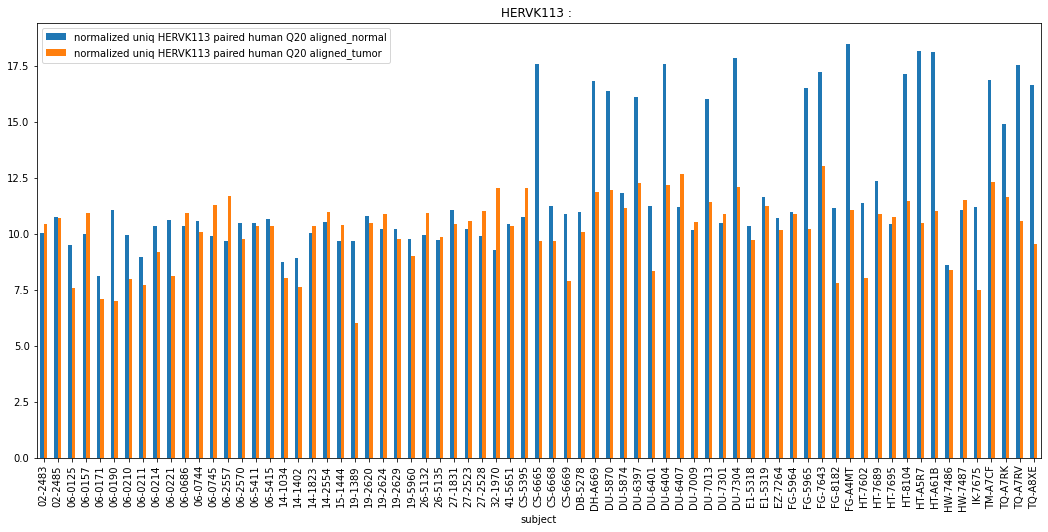

HERVK113:r10 


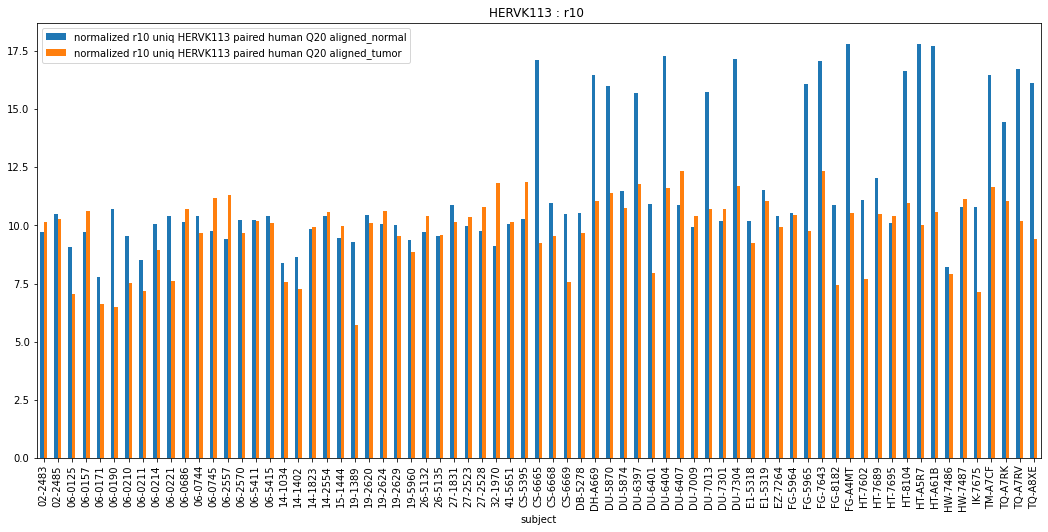

HERVK113:r100 


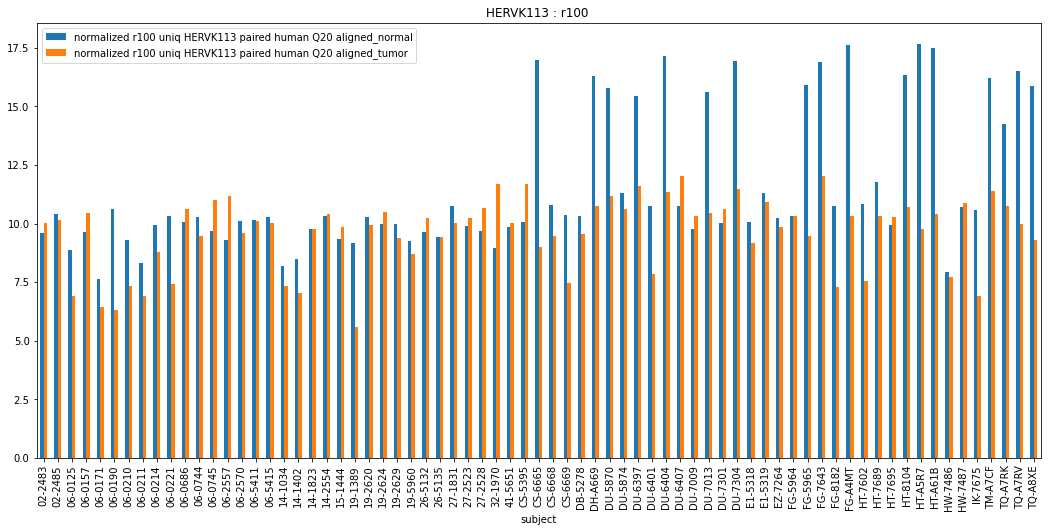

HERVK113:r1000 


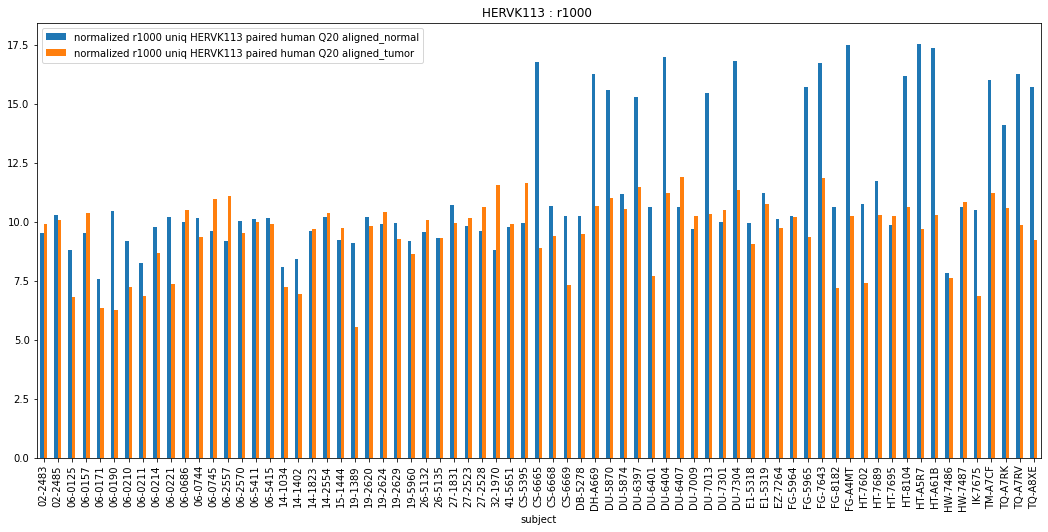

HERVK113:r10000 


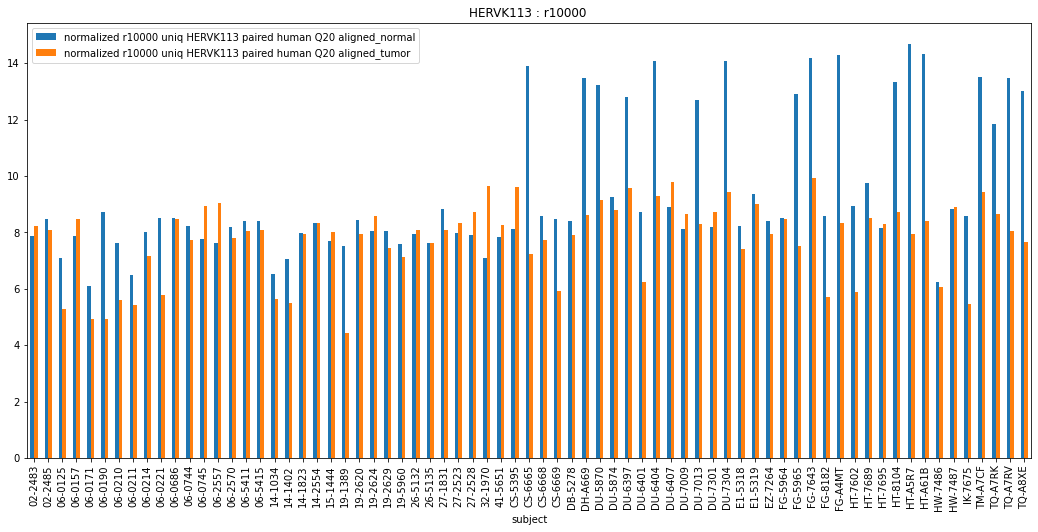

SVA_A:


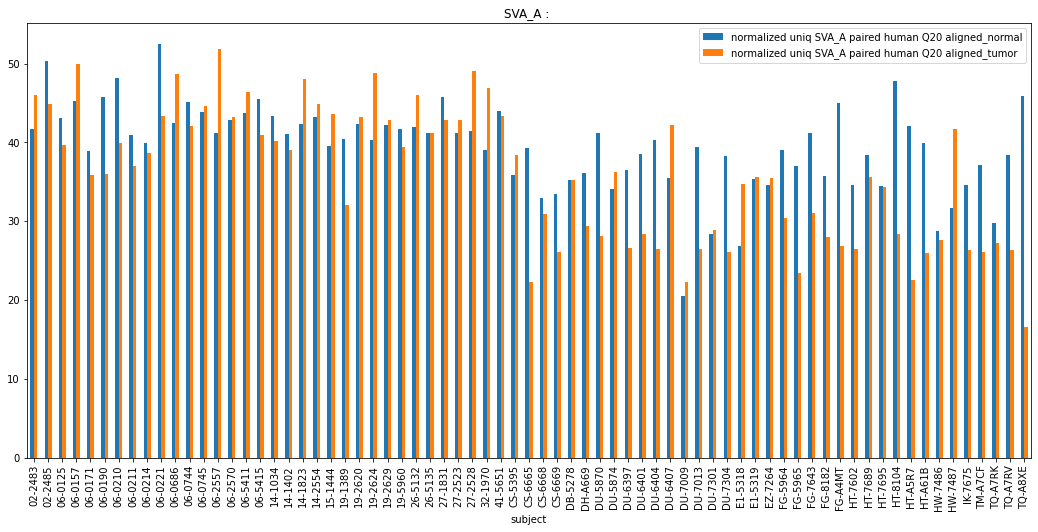

SVA_A:r10 


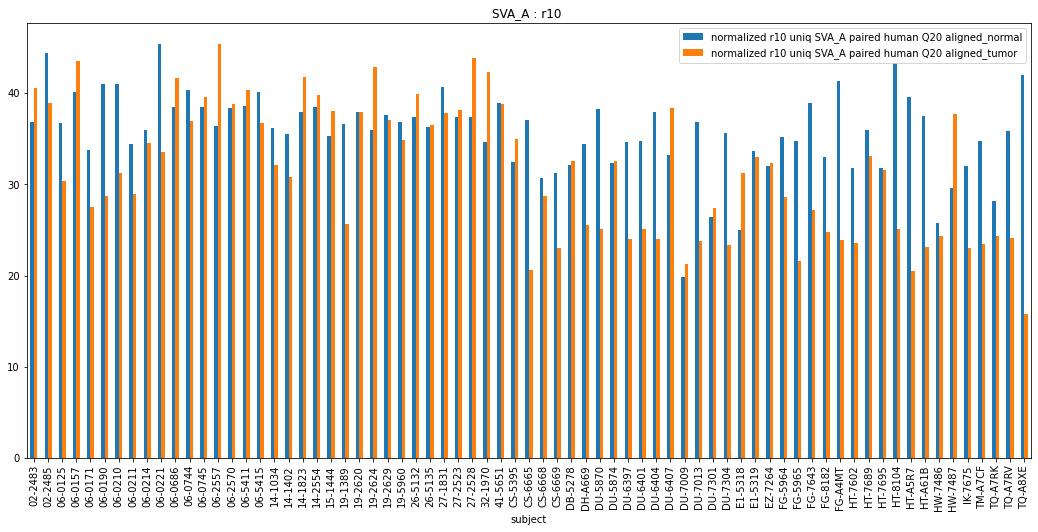

SVA_A:r100 


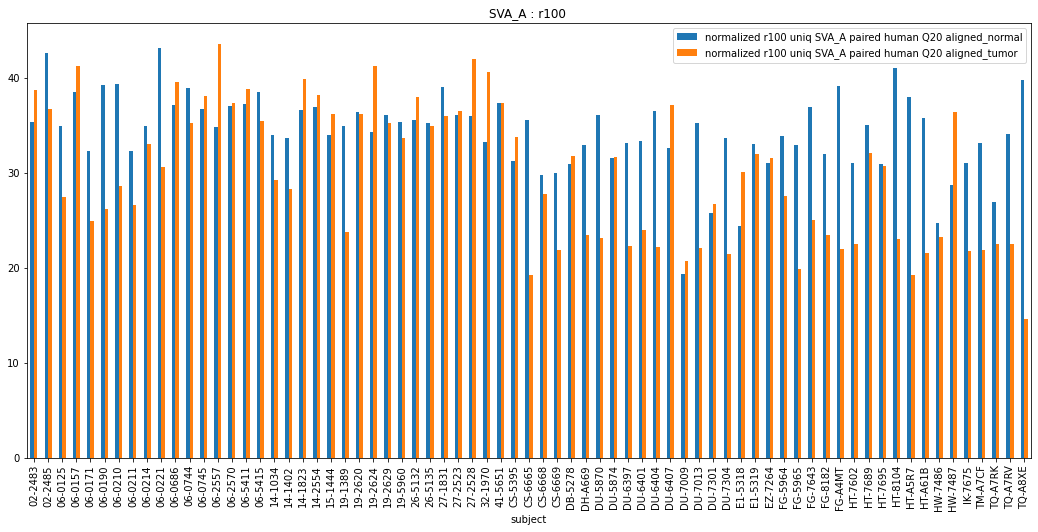

SVA_A:r1000 


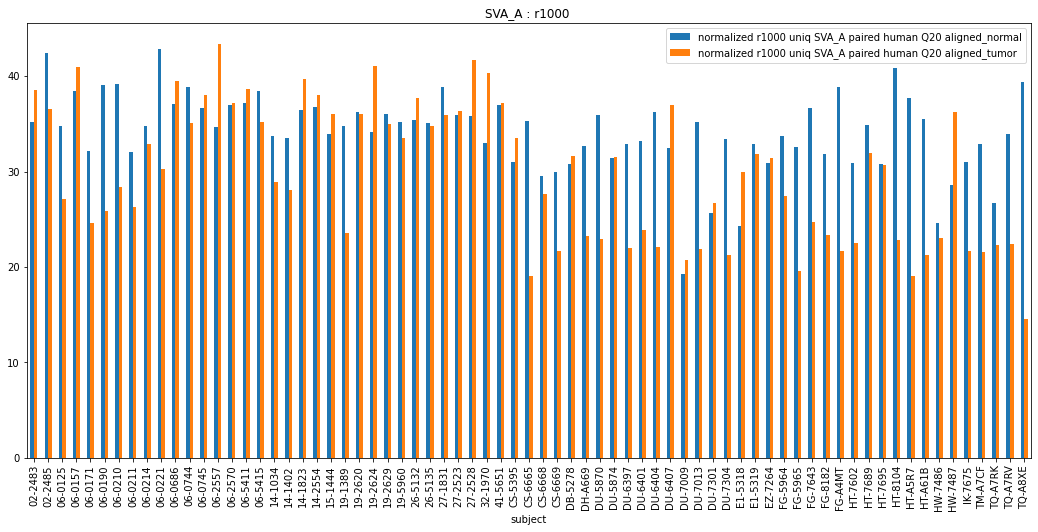

SVA_A:r10000 


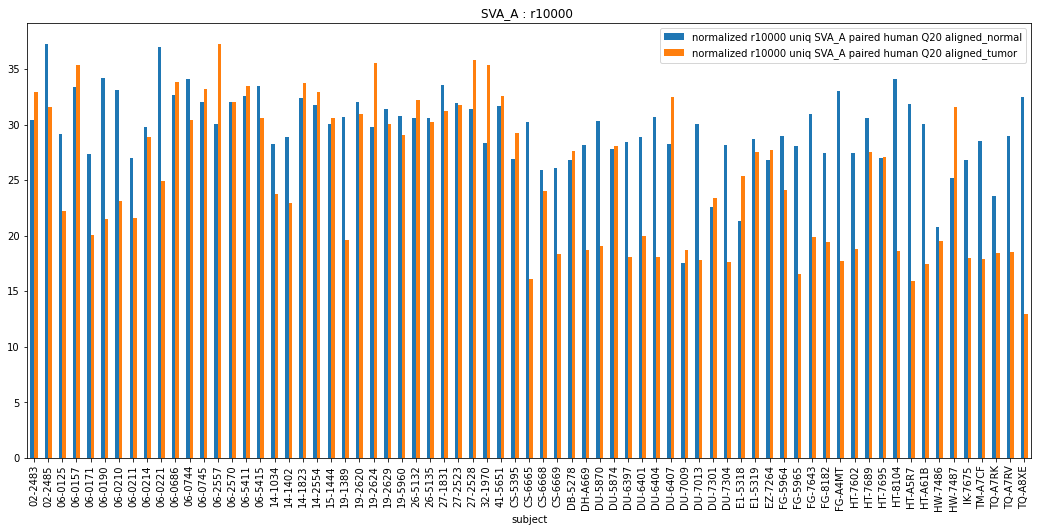

SVA_B:


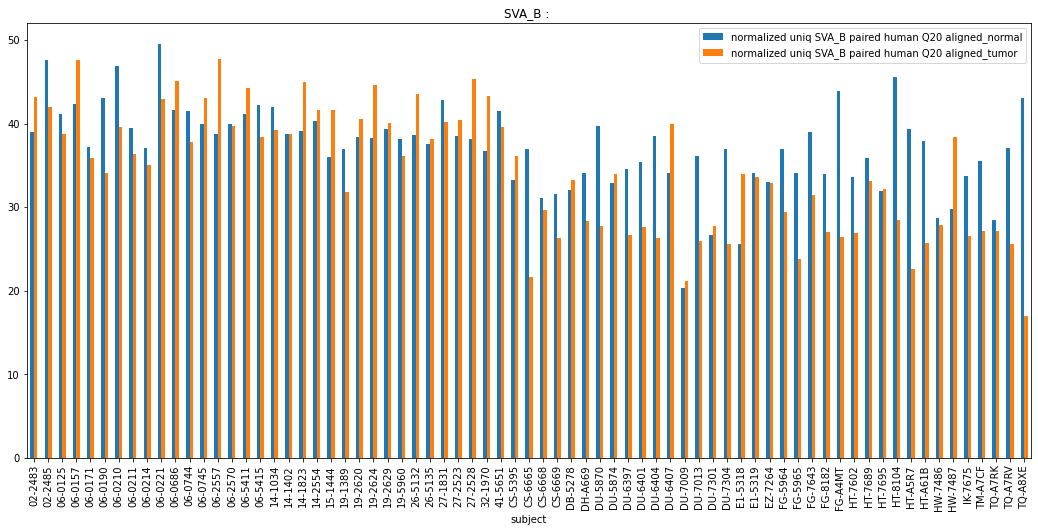

SVA_B:r10 


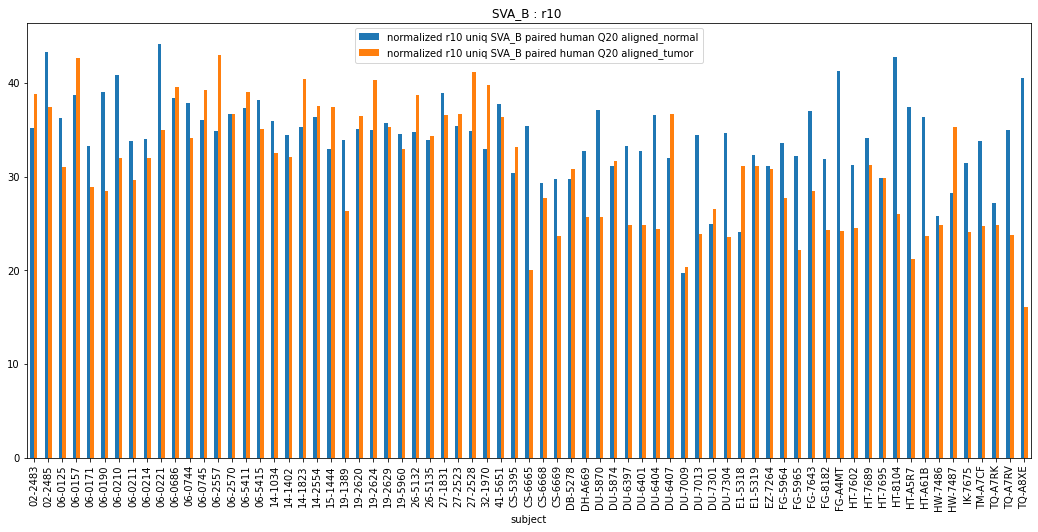

SVA_B:r100 


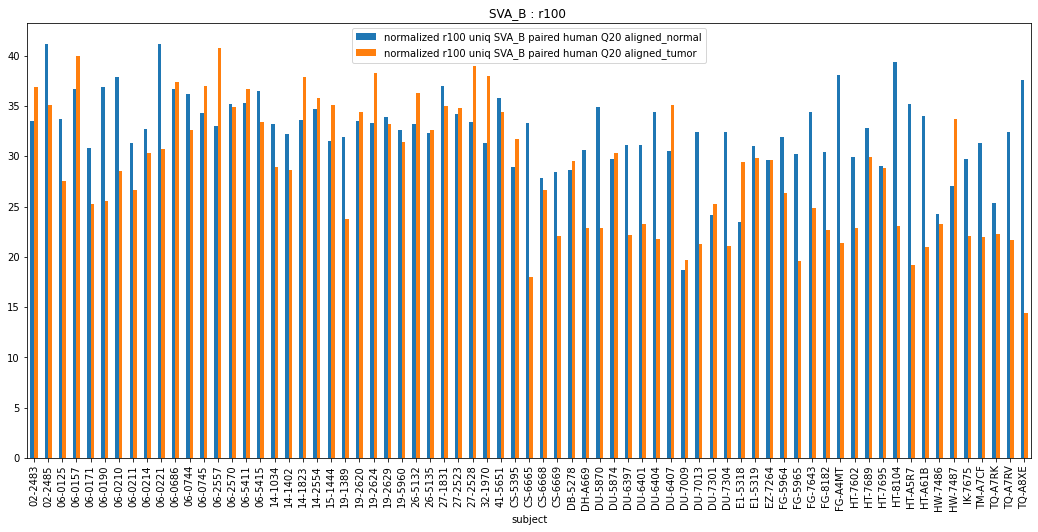

SVA_B:r1000 


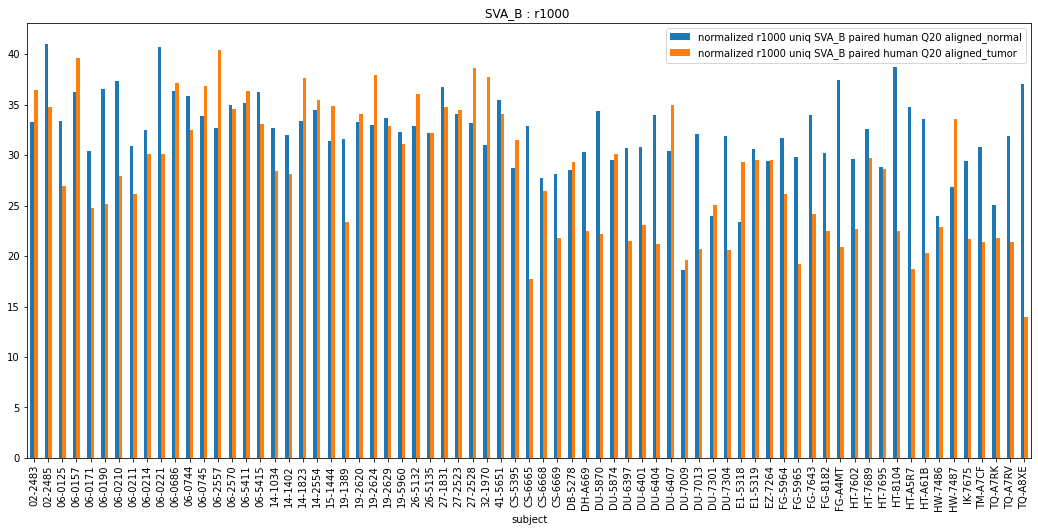

SVA_B:r10000 


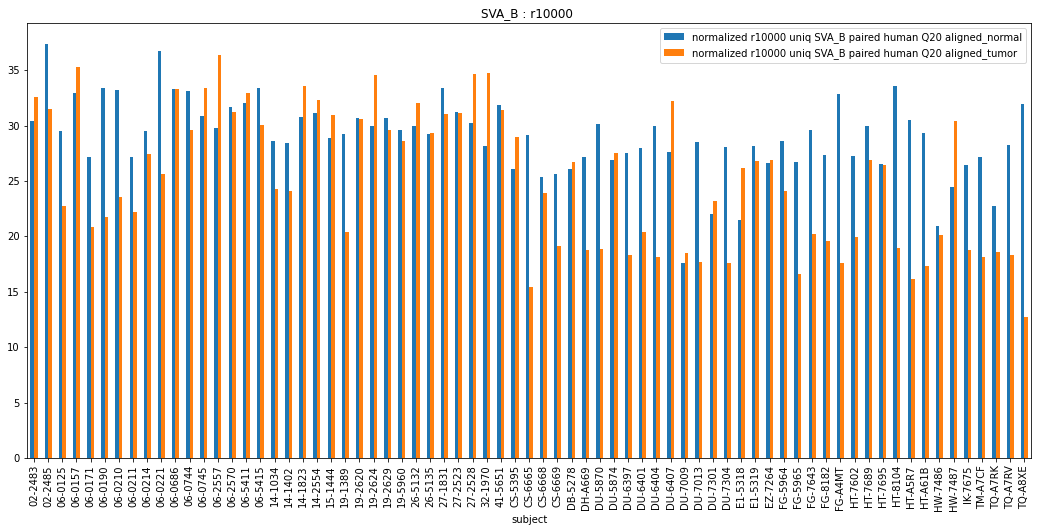

SVA_C:


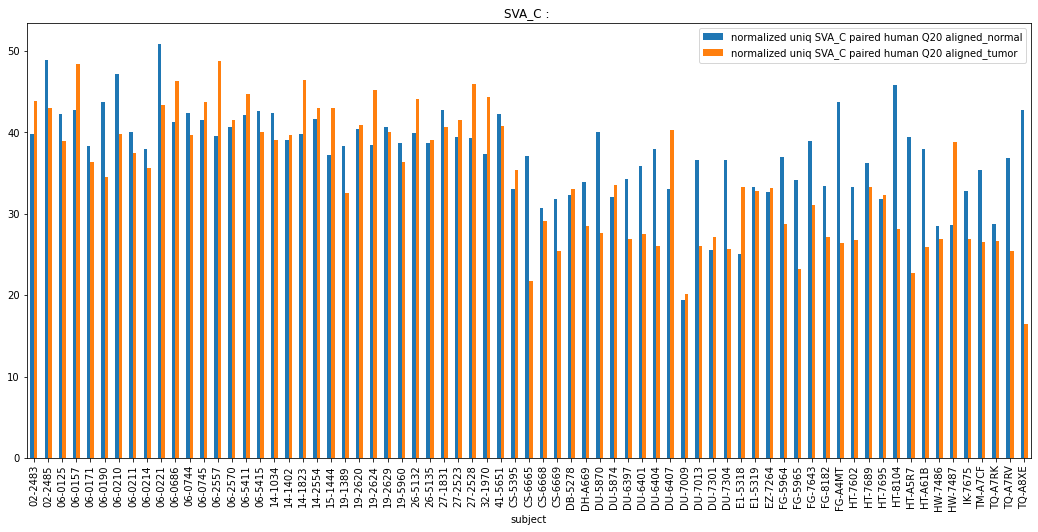

SVA_C:r10 


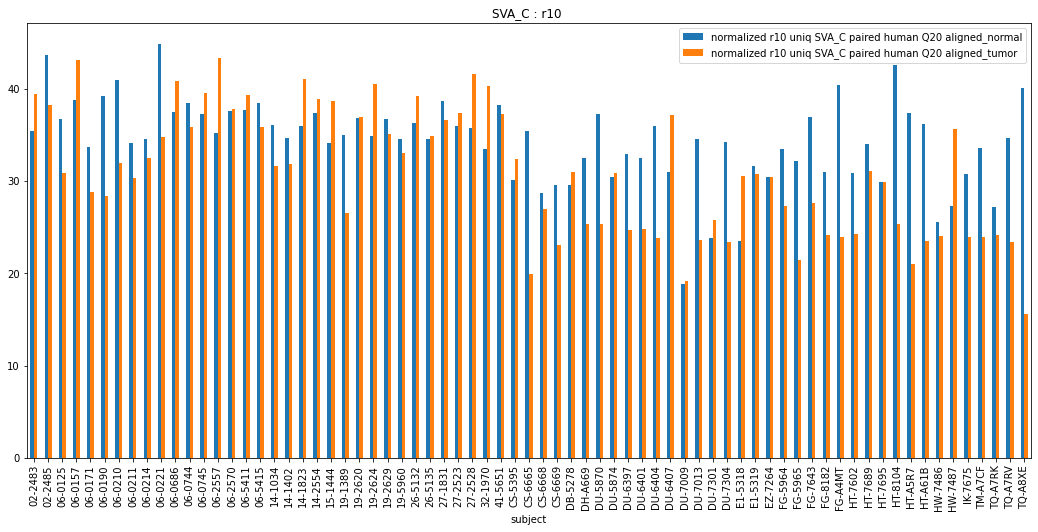

SVA_C:r100 


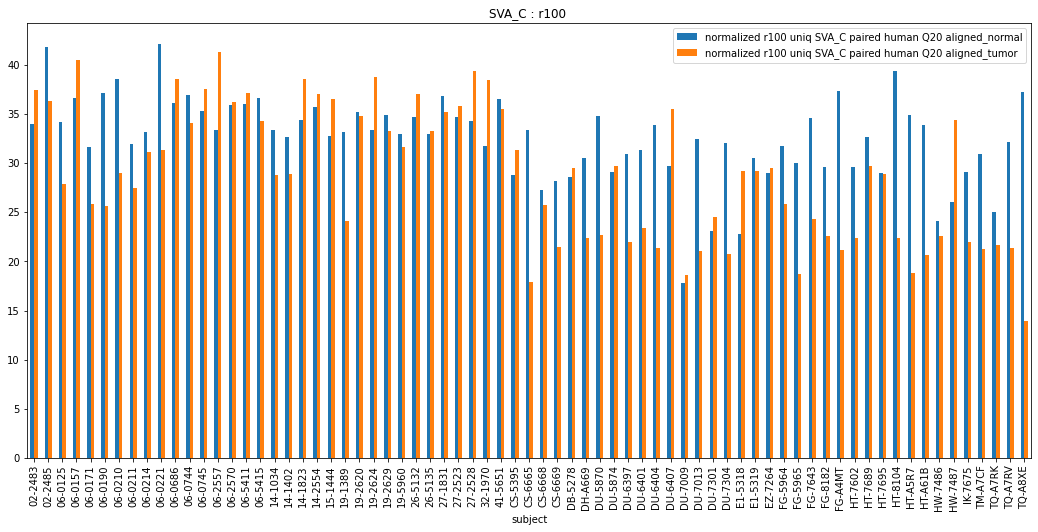

SVA_C:r1000 


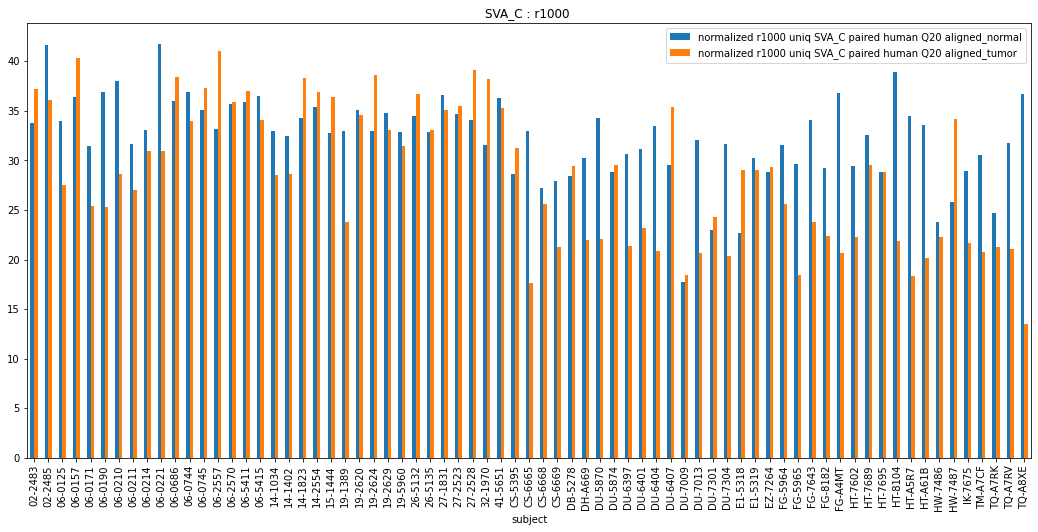

SVA_C:r10000 


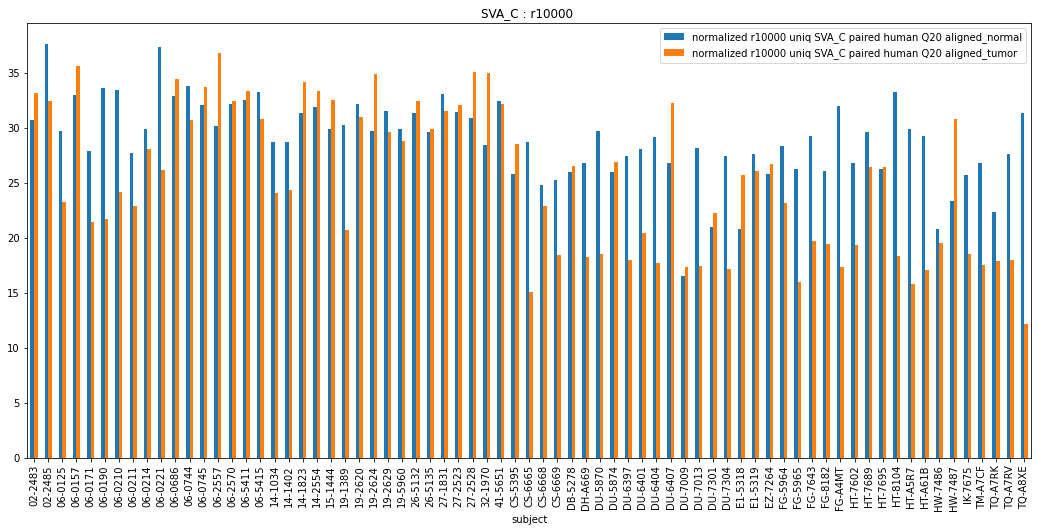

SVA_D:


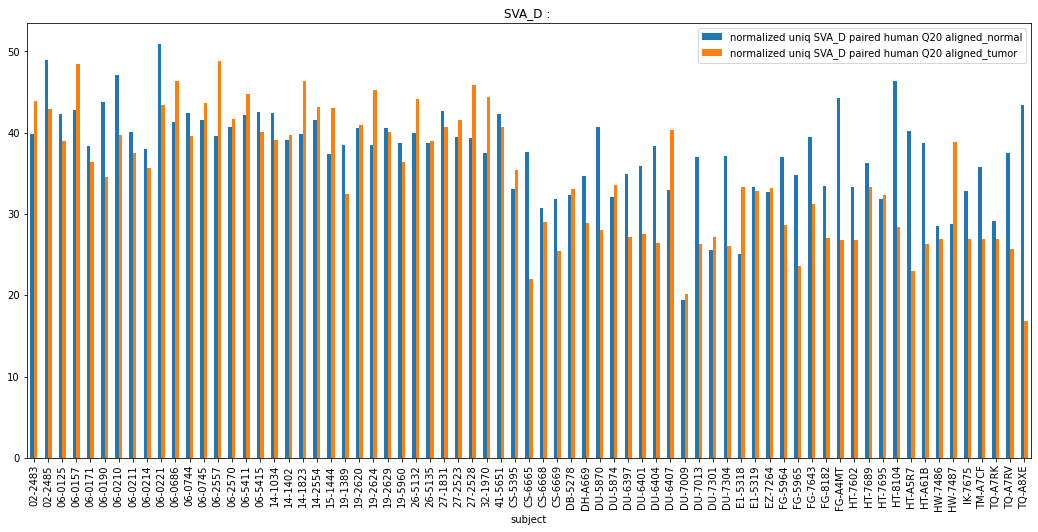

SVA_D:r10 


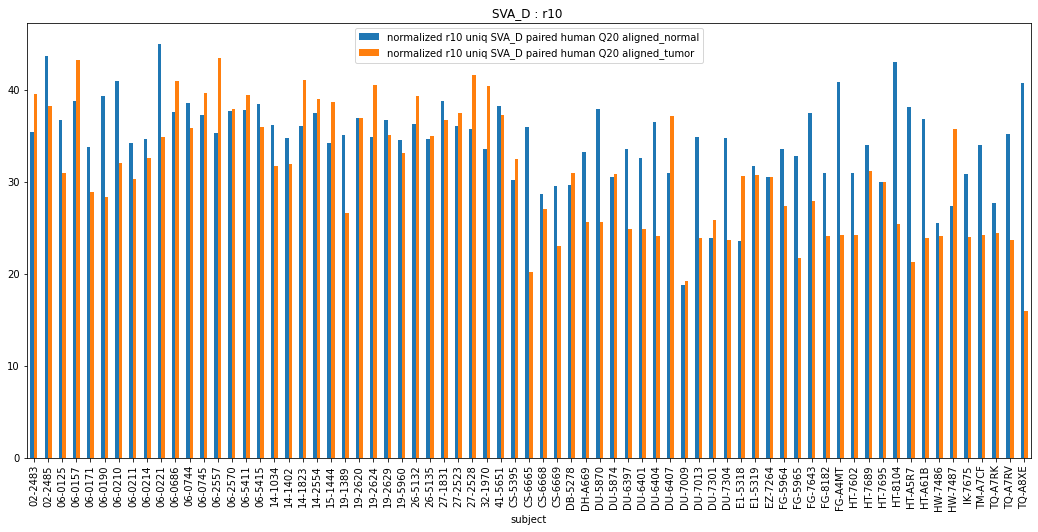

SVA_D:r100 


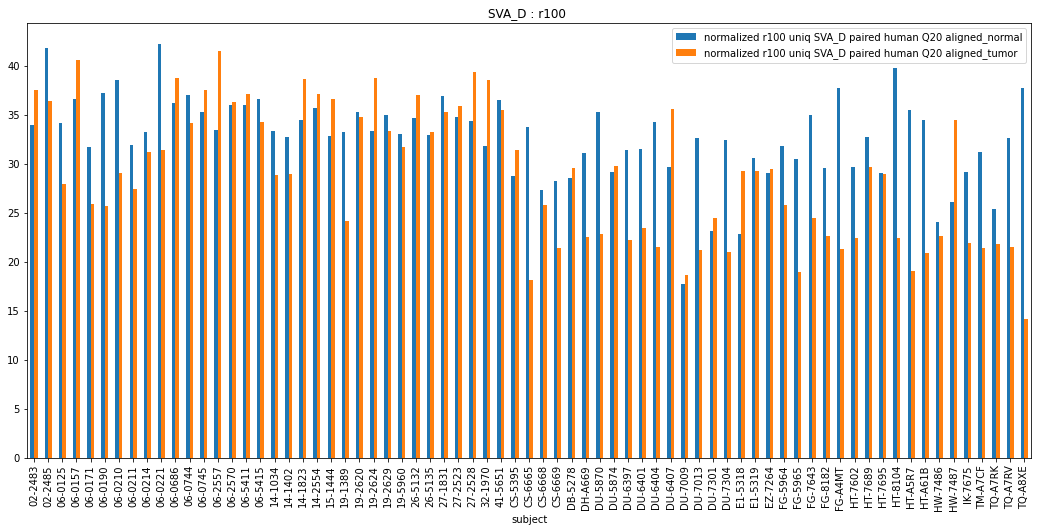

SVA_D:r1000 


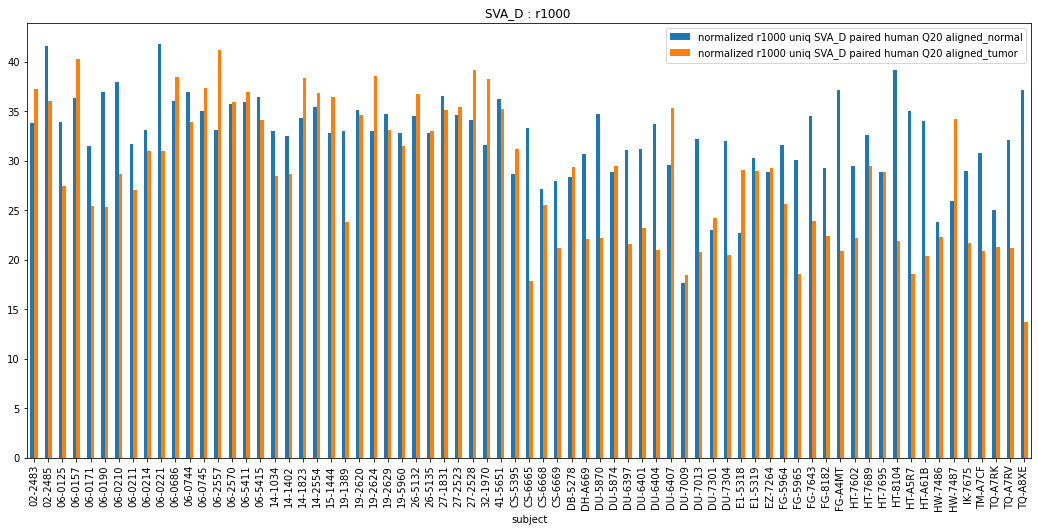

SVA_D:r10000 


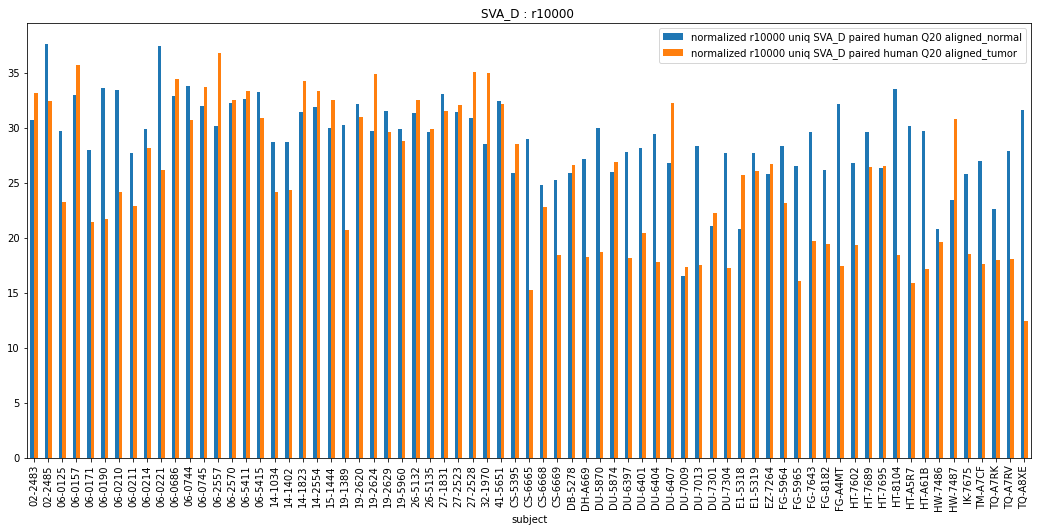

SVA_E:


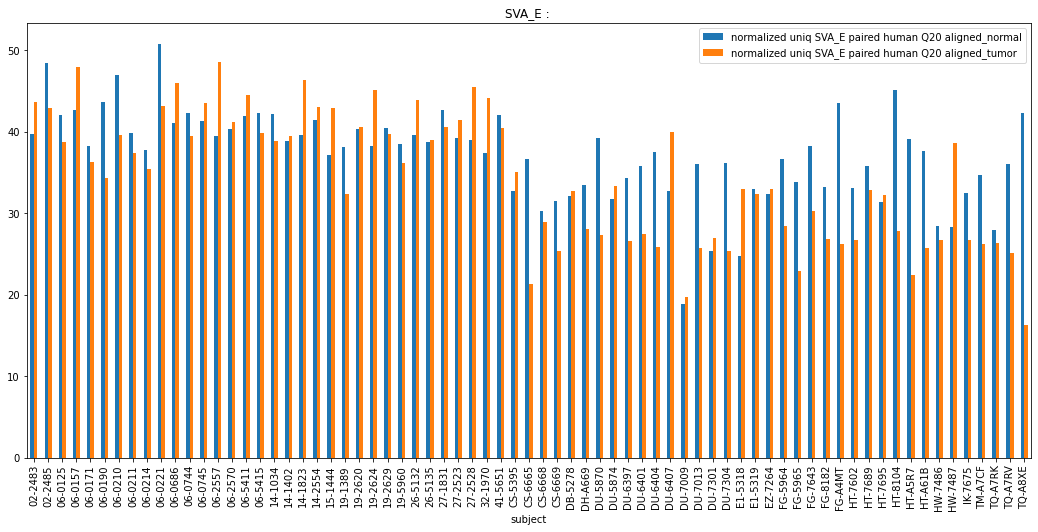

SVA_E:r10 


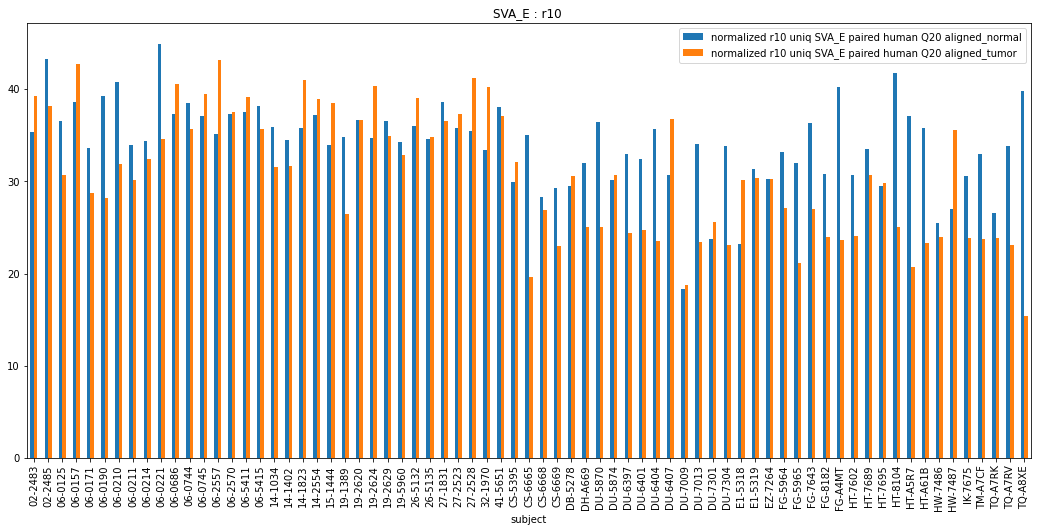

SVA_E:r100 


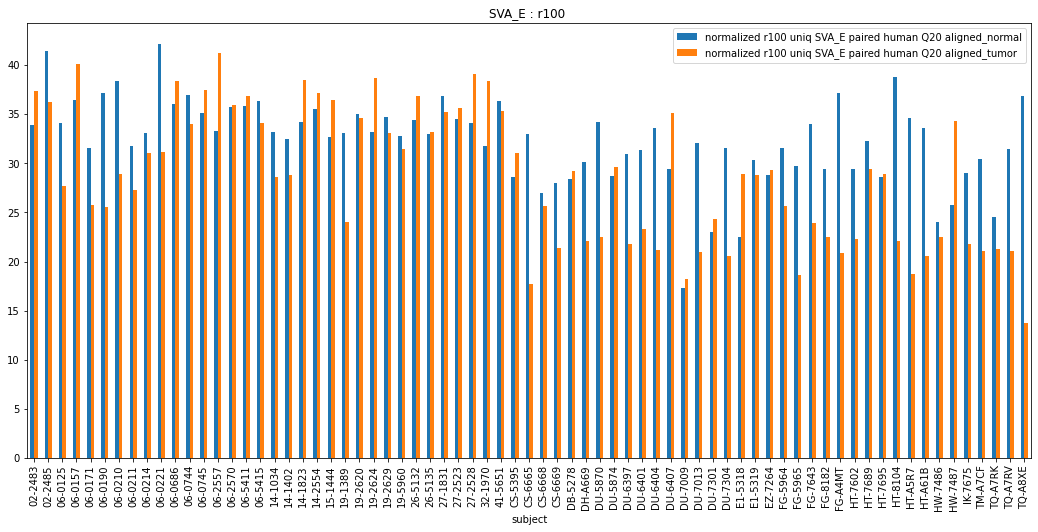

SVA_E:r1000 


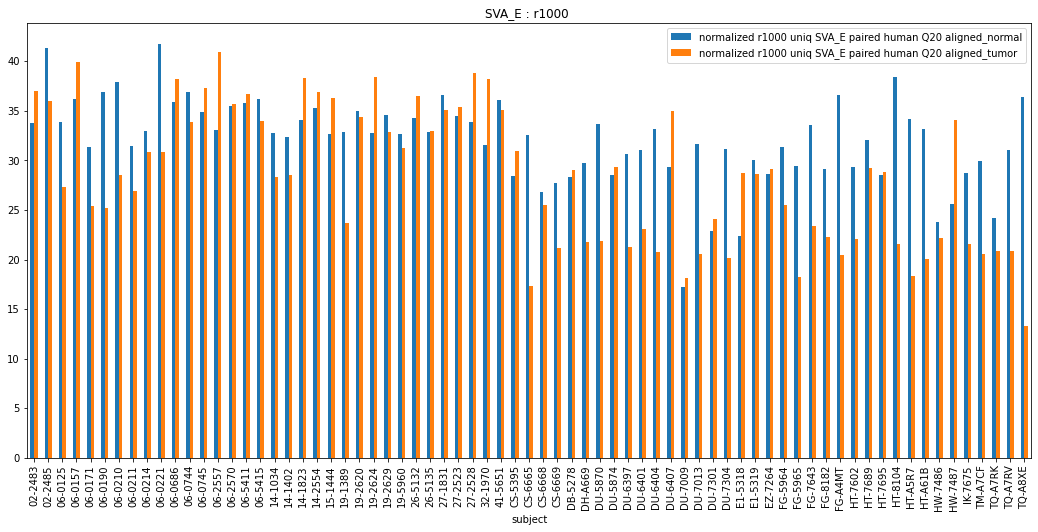

SVA_E:r10000 


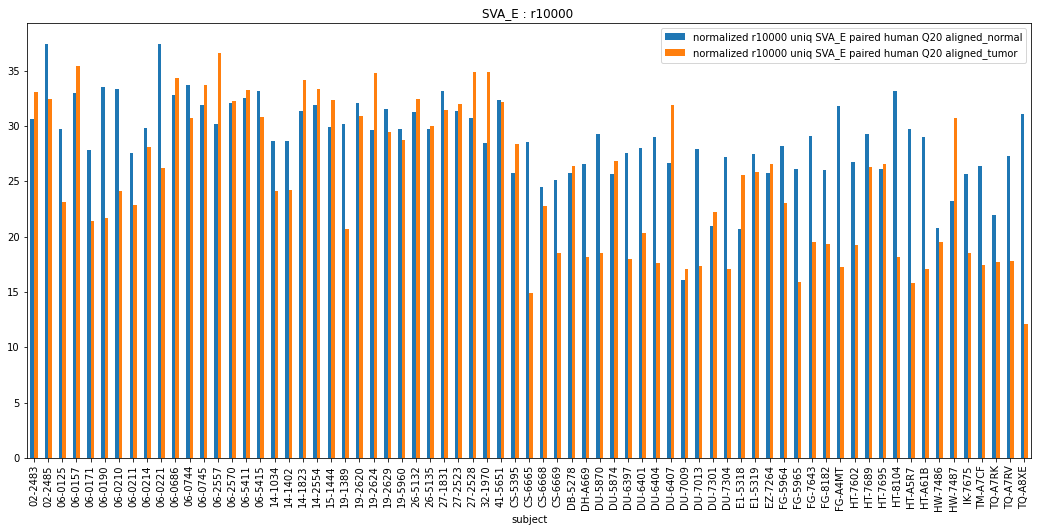

SVA_F:


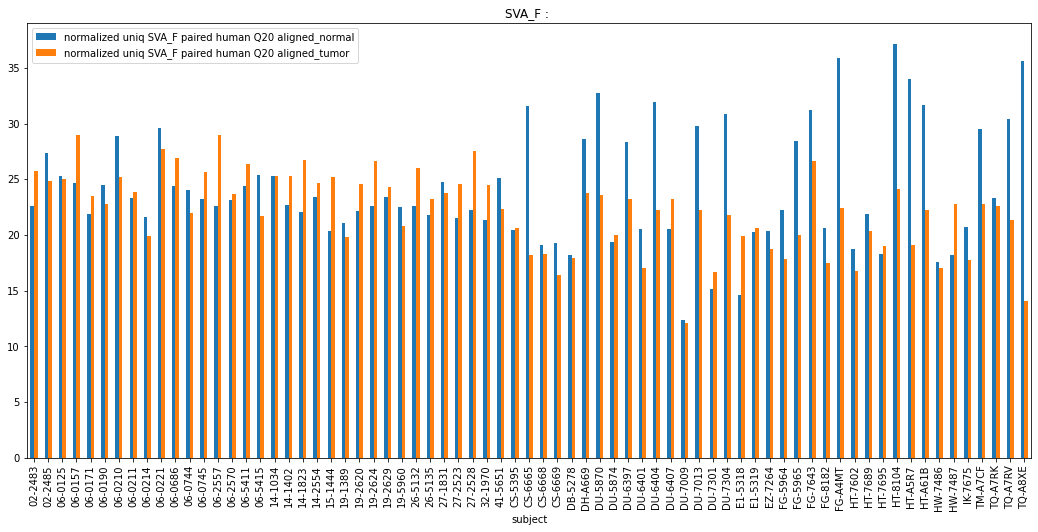

SVA_F:r10 


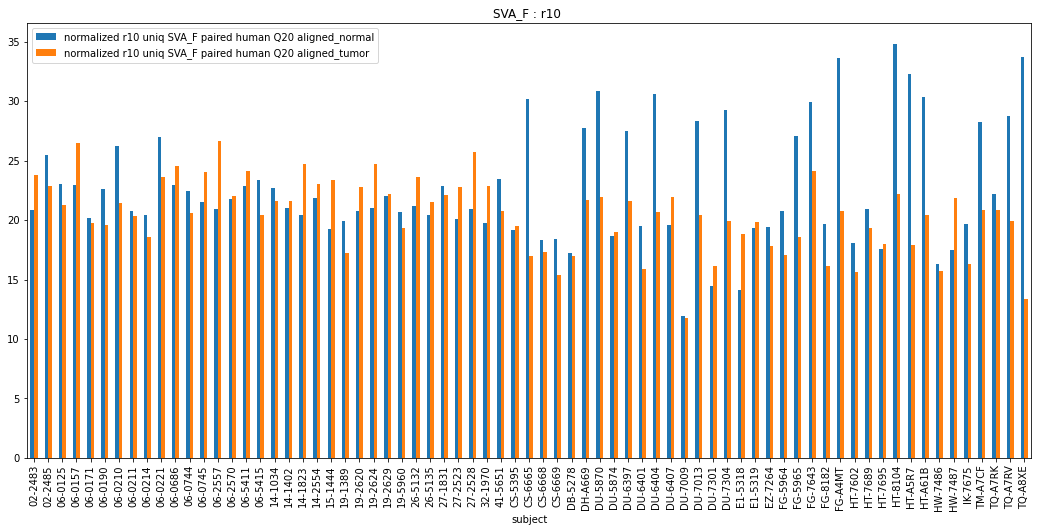

SVA_F:r100 


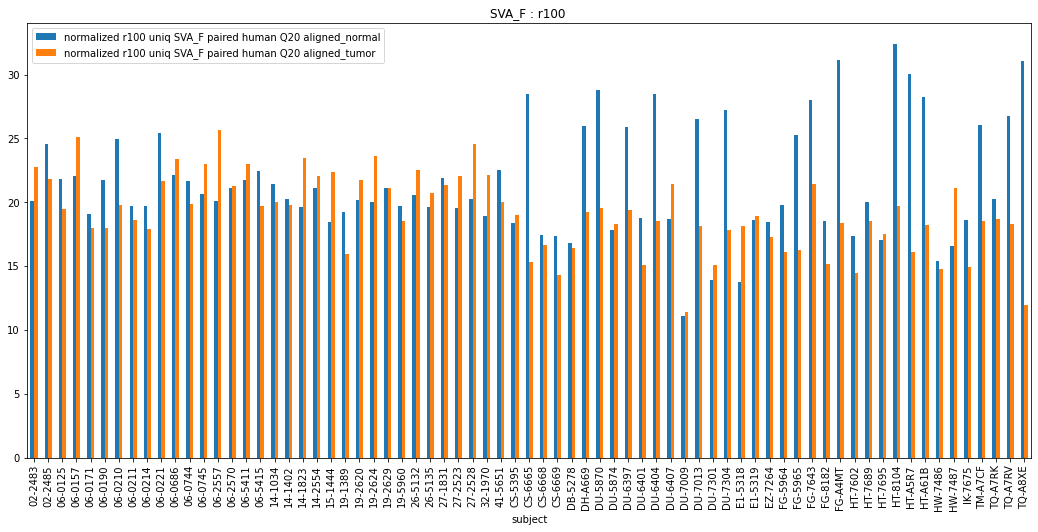

SVA_F:r1000 


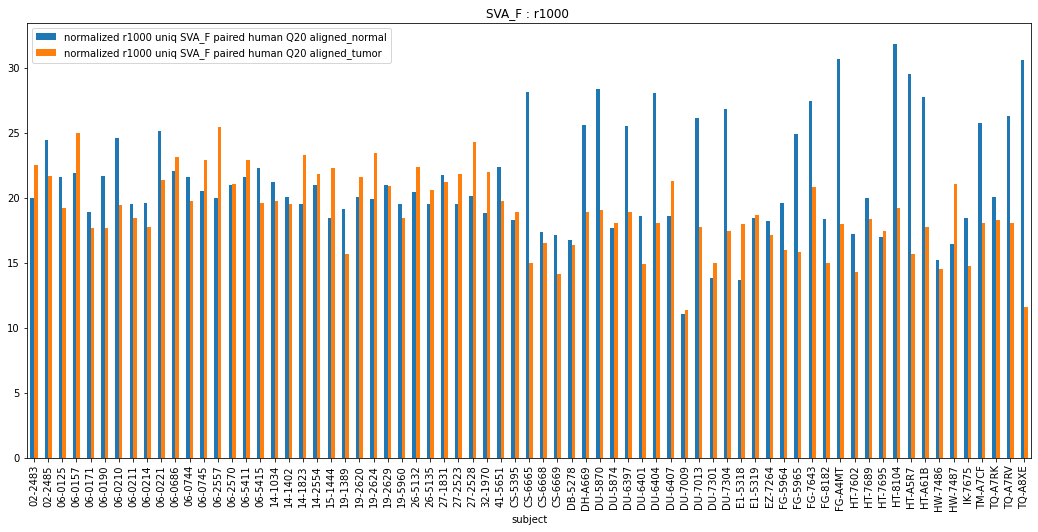

SVA_F:r10000 


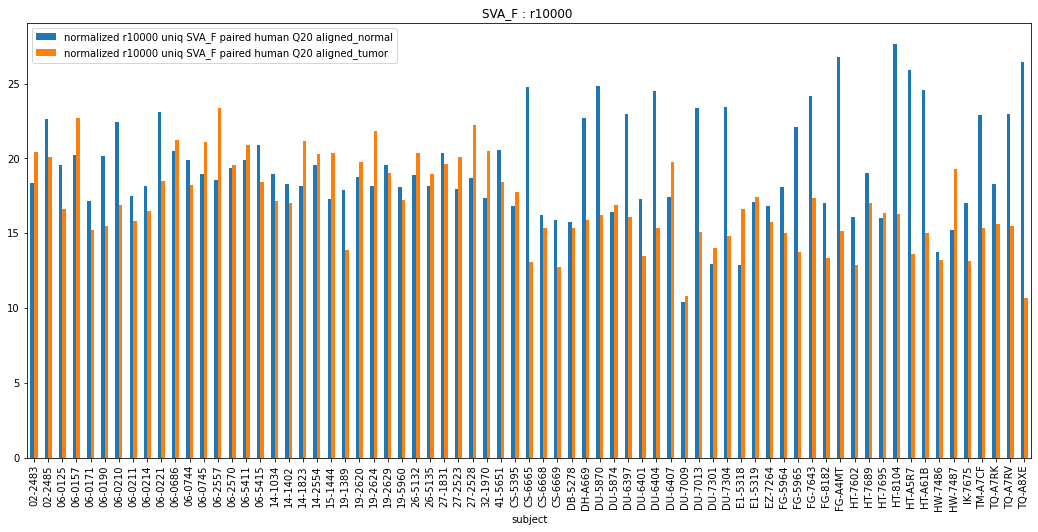

In [83]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        tn.plot(x='subject',y=['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_normal',
                          'normalized '+s+'uniq '+hkle+' paired human Q20 aligned_tumor'],
                title=hkle+" : "+s,
            kind='bar')
        plt.show()

CS-6186 and DU-5872 are weird because there are 2 samples with different read lengths merged and I didn't do anything about it here.

